## Planar data classification with a  hidden layer

Target: to see the difference between one hidden layer model and the one using logistic regression

#### Learning target of this homework
. Implement a 2-class classification neural network with a single hidden layer

. Use units with a non-linear activation function, such as tanh

. compute the "cross entropy loss"

. implement forward and backward propagation

### 1. Package

In [1]:
# package loading
import numpy as np
import matplotlib.pyplot as plt
from testCase import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets
np.random.seed(1)   # set a seed so that the results are consistent

## 2. Dataset

First, load a "flower" 2 - class dataset into variables X and Y

In [2]:
X, Y = load_planar_dataset()

visualize the dataset using matplotlib, the data looks like a flower with some red points. target is to build a model fit this data

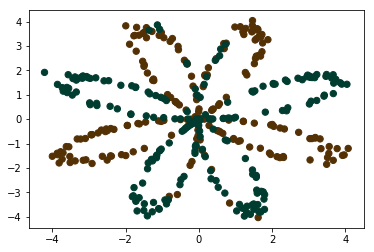

In [3]:
# visulization data

plt.scatter(X[0,:], X[1,:],c= Y[0], s = 40, cmap = plt.cm.BrBG)

You have 

a numpy-array (matrix)  X that contains your features (X1, X2)

a numpy-array (matrix)  Y that contains your labels (red: 0, blue: 1)

## 3. Data Wraggling

In [4]:
### START CODE HERE ### (≈ 3 lines of code)
shape_X = X.shape
shape_Y = Y.shape
m = Y.size   # the size of the training set
print('The shape of X is: ' + str(shape_X))
print('The shape of Y is: ' + str(shape_Y))
print('I have m = %d training examples!' % (m))

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
I have m = 400 training examples!


## 4. Simple logistic regression

In [5]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV(cv=3)
clf.fit(X.T, Y.T.ravel())

LogisticRegressionCV(Cs=10, class_weight=None, cv=3, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

Text(0.5,1,'Logistic Regression')

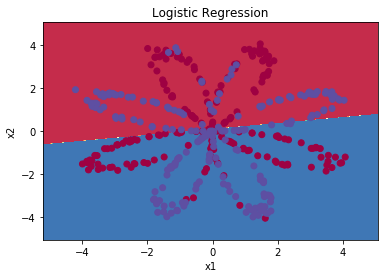

In [6]:
# plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")

In [7]:
X.shape

(2, 400)

In [8]:
# Print accuracy
LR_predictions = clf.predict(X.T)
print('Accuracy of logistic regression: {}'.format( float(np.dot(Y, LR_predictions) + np.dot(1-Y, 1 - LR_predictions))/ float(Y.size)*100) 
      + '%' + ' percent of correctly labelled datapoints.')

# np.dot(Y, LR_predictions)       正序排列正确的
# np.dot(1-Y, 1-LR_predictions)   逆序排列正确的

# This logistic regression can not work very well

Accuracy of logistic regression: 47.0% percent of correctly labelled datapoints.


## 5. Neural Network Model

In [9]:
# Initialization of the data size
# The architecture of the neural network
def layer_sizes(X,Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    ### START CODE HERE ### (≈ 3 lines of code)
    n_x = X.shape[0]    # the unit of the input layer  No.= 2
    n_h = 4             # hidden layer unit is 4
    n_y = Y.shape[0]    # the number of the label  = 1
    
    ### END CODE HERE ###
    return (n_x, n_h, n_y)

In [10]:
X_assess, Y_assess = layer_sizes_test_case()

In [11]:
X_assess.shape

(5, 3)

In [12]:
(n_x, n_h, n_y) = layer_sizes(X_assess, Y_assess)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 5
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 2


## 6. Initialize the model's parameters

In [13]:
# Initialize_parameters

def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    # we set up a seed so that the output can match ours
    np.random.seed(2)
    W1 = np.random.randn(n_h, n_x) * 0.01      # dim = (n_h, n_x)
    b1 = np.zeros((n_h,1))                     # dim = (n_h, 1)
    W2 = np.random.randn(n_y, n_h) * 0.01      # dim = (n_y, n_h)
    b2 = np.zeros((n_y,1))                     # dim = (n_y, 1)
    # use dictionary to store the data here
    params = {'W1':W1,
              'b1':b1,
              'W2':W2,
              'b2':b2}
    return params

In [14]:
n_x, n_h, n_y = initialize_parameters_test_case()
parameters = initialize_parameters(n_x, n_h, n_y)
print (n_x, n_h , n_y)
print('W1 = ' + str(parameters['W1']))
print('b1 = ' + str(parameters['b1']))
print('W2 = ' + str(parameters['W2']))
print('b2 = ' + str(parameters['b2']))

2 4 1
W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]


## 7. The loop

1. retrieve each parameter from the dictionary "parameters" (which is the output of initialize_parameters()) by using parameters["...."]
2. implement forward propagation. Compute z[1], A[1], z[2], A[2]
3. values needed in the backpropagation are stored in "cache". The cache will be given as an input to the backpropagation function

In [15]:
# GRADED FUNCTION: function_propagation
def forward_propagation(X,parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # retrieve each parameter from the dictionary 'parameters'
    W1 =parameters["W1"]
    b1 =parameters["b1"]
    W2 =parameters["W2"]
    b2 =parameters["b2"]
    
    # calculation z
    Z1 = np.dot(W1, X) + b1          # dim = (4,m)
    A1 = np.tanh(Z1)                # activation function np.tanh()
    Z2 = np.dot(W2, A1) + b2        # dim = (1,m)
    A2 = sigmoid(Z2)                # activation function sigmoid   dim(1,m)
    assert(A2.shape == (1, X.shape[1]))
    
    cache = { "Z1": Z1,
              "A1": A1,
              "Z2": Z2,
              "A2": A2,
    }
    return A2, cache

In [16]:
X_assess, parameters = forward_propagation_test_case()
A2, cache = forward_propagation(X_assess, parameters)
print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2']))

-0.0004997557777419902 -0.000496963353231779 0.0004381874509591466 0.500109546852431


In [17]:
# Compute cost function 
def compute_cost(A2, Y):
    """
    Computes the cross-entropy cost given in equation (13)
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    
    Returns:
    cost -- cross-entropy cost given equation (13)
    """
    m = Y.shape[1]   # the number of example 
    
    # Compute the cross-entropy cost    #be aware that the output here is A2  - Y 
    loss = Y * np.log(A2) + (1 - Y) * np.log(1 - A2)
    #loss = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))
    
    cost = (-1./m) * np.sum(loss)
    
    # Squeeze the cost data that we want
    cost = np.squeeze(cost)
    
    return cost

In [18]:
A2, Y_assess, parameters = compute_cost_test_case()
print("cost = " + str(compute_cost(A2, Y_assess)))

cost = 0.6929198937761265


In [19]:
# Backward propagation in the neural network
# Backpropagation is usually the hardest (most mathematical) part in deep learning. 
# To help you, here again is the slide from the lecture on backpropagation. 
# You'll want to use the six equations on the right of this slide, since you are building a vectorized implementation.

In [20]:
# GRADED FUNCTION: backward_propagation
def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = Y.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    ### START CODE HERE ### (≈ 2 lines of code)
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    # Retrieve also A1 and A2 from dictionary "cache".
    ### START CODE HERE ### (≈ 2 lines of code)
    A1 = cache['A1']
    A2 = cache['A2']
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    ### START CODE HERE ### (≈ 6 lines of code, corresponding to 6 equations on slide above)
    
    # calculate the second layer
    dZ2 = A2 - Y      # sigmoid activation function   dz = A2 - Y
    dW2 = (1./m) * np.dot(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis = 1, keepdims = True)  # db = dz 
    
    # calculate the hidden layer here
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))   # activation np.tanh, derivative (1-a^^2), elementwise multiply
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis = 1, keepdims = True)
    grads = {"dW1": dW1,
            "db1": db1,
            "dW2": dW2,
            "db2": db2}

    return grads

In [21]:
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()

grads = backward_propagation(parameters, cache, X_assess, Y_assess)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 0.01018708 -0.00708701]
 [ 0.00873447 -0.0060768 ]
 [-0.00530847  0.00369379]
 [-0.02206365  0.01535126]]
db1 = [[-0.00069728]
 [-0.00060606]
 [ 0.000364  ]
 [ 0.00151207]]
dW2 = [[ 0.00363613  0.03153604  0.01162914 -0.01318316]]
db2 = [[0.06589489]]


General gradient descent rule

In [22]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters"
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # Retrieve each gradient from the dictionary "grads"
    ### START CODE HERE ### (≈ 4 lines of code)
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    
    # Update rule for each parameter
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {'W1': W1,
                  'b1': b1,
                  'W2': W2,
                  'b2': b2,
    }
    return parameters

In [23]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]


## 8. Integrate parts and build the all parameters

In [24]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost = False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    # layer_size for the calculation
    np.random.seed(3)
    n_x = layer_sizes(X,Y)[0]
    n_y = layer_sizes(X,Y)[2]
    
    # Initialize parameters, then retrieve W1, b1, W2, b2. Inputs: "n_x, n_h, n_y". Outputs = "W1, b1, W2, b2, parameters".
    ### START CODE HERE ### (≈ 5 lines of code)
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    for i in range(0, num_iterations):
        # forward propagation
        A2, cache = forward_propagation(X,parameters)

        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".  no need parameters
        cost = compute_cost(A2, Y)
        
        # backward propagation
        grads = backward_propagation(parameters, cache, X, Y)

        # update learning rate is default one
        parameters = update_parameters(parameters, grads)
        
        # print the cost every 1000 iterations
        if print_cost and i%1000 == 0:
            print("Cost after iteration %i : %f" %(i,cost))
        
    return parameters
    

In [25]:
X_assess, Y_assess = nn_model_test_case()
parameters = nn_model(X_assess, Y_assess, 4, num_iterations=10000, print_cost=False)

print("W1" + str(parameters["W1"]))
print("b1" + str(parameters["b1"]))
print("W2" + str(parameters["W2"]))
print("b2" + str(parameters["b2"]))

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


W1[[-4.18504158  5.3320106 ]
 [-7.53804968  1.20755081]
 [-4.19290896  5.3262137 ]
 [ 7.53800272 -1.20757612]]
b1[[ 2.32934596]
 [ 3.80999598]
 [ 2.33011353]
 [-3.81007324]]
W2[[-6033.8234738  -6008.14290893 -6033.08769876  6008.07930495]]
b2[[-52.67931694]]


## 9. Predictions for the calculation

predictions = $y_{prediction} = \mathbb 1 \text{{activation > 0.5}} = \begin{cases} 1 & \text{if}\ activation > 0.5 \\ 0 & \text{otherwise} \end{cases}$

Use your model to predict by building predict(). Use forward propagation to predict results.

In [26]:
def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    A2, cache = forward_propagation(X, parameters)
    predictions = (A2 > 0.5)
    
    return predictions

In [27]:
parameters, X_assess = predict_test_case()
predictions = predict(parameters, X_assess)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.6666666666666666


Cost after iteration 0 : 0.693048
Cost after iteration 1000 : 0.288083
Cost after iteration 2000 : 0.254385
Cost after iteration 3000 : 0.233864
Cost after iteration 4000 : 0.226792
Cost after iteration 5000 : 0.222644
Cost after iteration 6000 : 0.219731
Cost after iteration 7000 : 0.217504
Cost after iteration 8000 : 0.219471
Cost after iteration 9000 : 0.218562


Text(0.5,1,'Decision Boundary for hidden layer size 4')

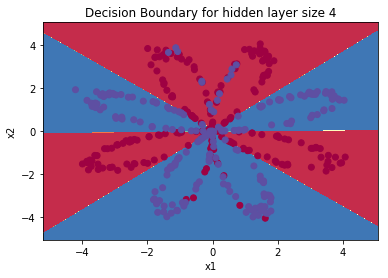

In [28]:
parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

In [29]:
# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 90%


The precision using NN 1 hidden layer is so much better now

## 10. Tuning hidden layer size

Accuracy for 1 hidden units: 63.5 %
Accuracy for 5 hidden units: 82.5 %
Accuracy for 10 hidden units: 83.0 %
Accuracy for 20 hidden units: 83.0 %


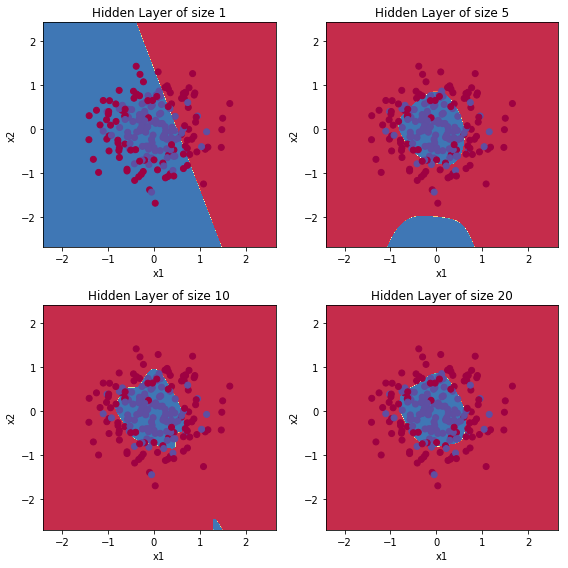

In [34]:
hidden_layer_sizes = [1, 5, 10, 20]
plt.figure(figsize=(8, 8))
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(2, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations = 10000)
    # if num_iteration = 1000, will underfitting
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

plt.tight_layout()

#### interpretation

1. The larger models are able to fit the training set better, until eventually the largest models overfit the data.
2. The best hidden layer size seems to be around n_h = 5
3. By regularization, which lets us use very large models without much overfitting

## 11. Performance on other datasets

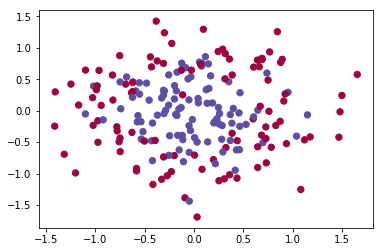

In [33]:
# Datasets
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

### START CODE HERE ### (choose your dataset)
dataset = "noisy_circles"
### END CODE HERE ###

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

# make blobs binary
if dataset == "blobs":
    Y = Y%2

# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y.ravel(), s=40, cmap=plt.cm.Spectral);

## Copyright : Andrew Ng-- Deeplearning.AI